In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random

In [18]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

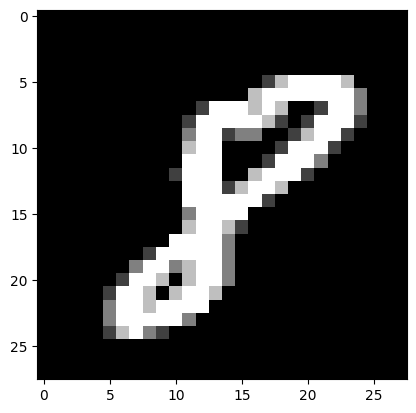

In [20]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28), cmap="gray")
plt.show()

In [21]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # 10 classes for digits 0–9
])

In [22]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.6785 - loss: 1.0389 - val_accuracy: 0.9544 - val_loss: 0.1582
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9519 - loss: 0.1575 - val_accuracy: 0.9699 - val_loss: 0.0949
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9692 - loss: 0.1024 - val_accuracy: 0.9767 - val_loss: 0.0697
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9756 - loss: 0.0786 - val_accuracy: 0.9820 - val_loss: 0.0578
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9808 - loss: 0.0650 - val_accuracy: 0.9833 - val_loss: 0.0518
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9823 - loss: 0.0577 - val_accuracy: 0.9841 - val_loss: 0.0485
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9837 - loss: 0.0518 - val_accuracy: 0.9849 - val_loss: 0.0457
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9862 -

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss = %.3f" % test_loss)
print("Accuracy = %.3f" % test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9429 - loss: 0.1940
Loss = 0.167
Accuracy = 0.952


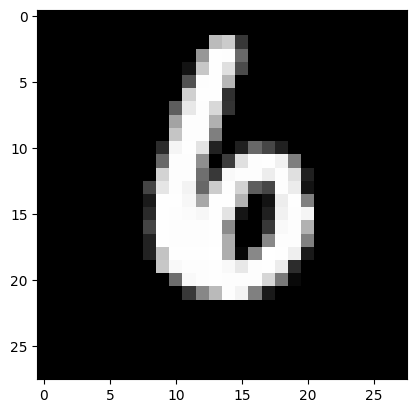

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Handwritten number in image is 6


In [23]:
n = random.randint(0, 9999)
plt.imshow(x_test[n], cmap='gray')
plt.show()

prediction = model.predict(x_test)
print("Handwritten number in image is %d" % np.argmax(prediction[n]))


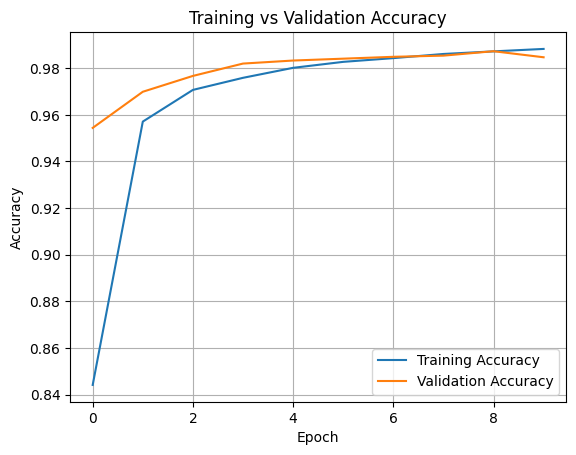

In [24]:
# Plot training and validation accuracy
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()